Import the required packages

In [1]:
from IPython.display import display
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

### Loading the original substrate list

First 30 compounds in the dataset (out of 2055):


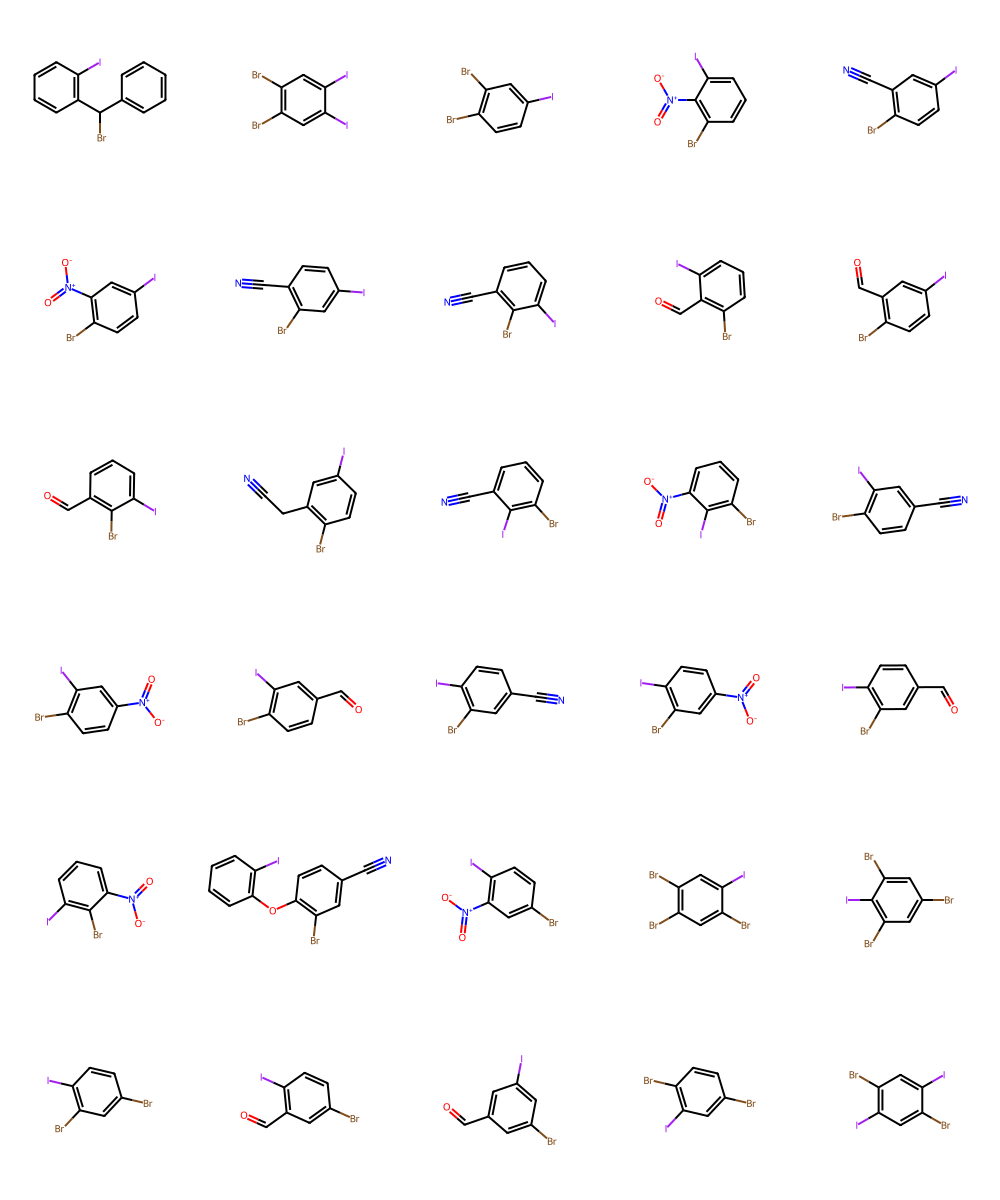

In [ ]:
# loading the smiles (assuming the smiles are in the first column and there is a column header in the first line
# (smiles starting on line 2))
smiles_list = pd.read_csv("dummy_smileslist.csv",index_col=0,header=0).index.to_list()

# visualize the molecules
nr_to_show = 30
mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
print(f"First {nr_to_show} compounds in the dataset (out of {len(smiles_list)}):")
Draw.MolsToGridImage(mol_list[:nr_to_show],molsPerRow=5, maxMols=100)

Defining a function to look for functional groups and remove them if requested

In [ ]:
def functionality_lookup(smarts_functionality, # SMARTS string for the functional group in question
                         dset = smiles_list, # list of the smiles in the dataset
                         print_molecules = True,  # option to turn off printing of the structures
                         remove_from_dset = False):  # option to remove the compounds from the dataset
    """
    Visualizes compounds in the dataset containing the functional group specified by a SMARTS string.
    Removes these compounds if requested.
    Returns the dataset as a SMILES list.
    """

    # searched pattern
    pattern_functionality = Chem.MolFromSmarts(smarts_functionality)

    # convert the dataset smiles to mol objects
    mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

    # check for matching smiles in the dataset
    counter = 0
    matching_smiles = []
    for i,mol in enumerate(mol_list):
        # check if matched
        match_functionality = mol.HasSubstructMatch(pattern_functionality)
        # save if matched
        if match_functionality:
            counter +=1
            matching_smiles.append(smiles_list[i])
    print(f"{counter} molecules contain the substructure '{smarts_functionality}'.")

    # visualize the molecules if requested
    if print_molecules:
        print(f"Visualization of the matching molecules:")
        match_mols = [Chem.MolFromSmiles(smiles) for smiles in matching_smiles]
        depiction = Draw.MolsToGridImage(match_mols,molsPerRow=7, maxMols=10000000)
        display(depiction)

    pruned_smiles_list = [smiles for smiles in smiles_list]
    # remove the matched smiles if requested
    if matching_smiles and remove_from_dset:
        print("Removing the matching molecules.")
        for smiles in matching_smiles:
            pruned_smiles_list.remove(smiles)
        print(f"After pruning, the dataset still contains {len(pruned_smiles_list)} molecules.")

    # return the pruned smiles list
    return pruned_smiles_list

Now that we have a function, we can for instance look for compounds containing nitriles.

112 molecules contain the substructure 'C#N'.
Visualizating of the matching molecules:


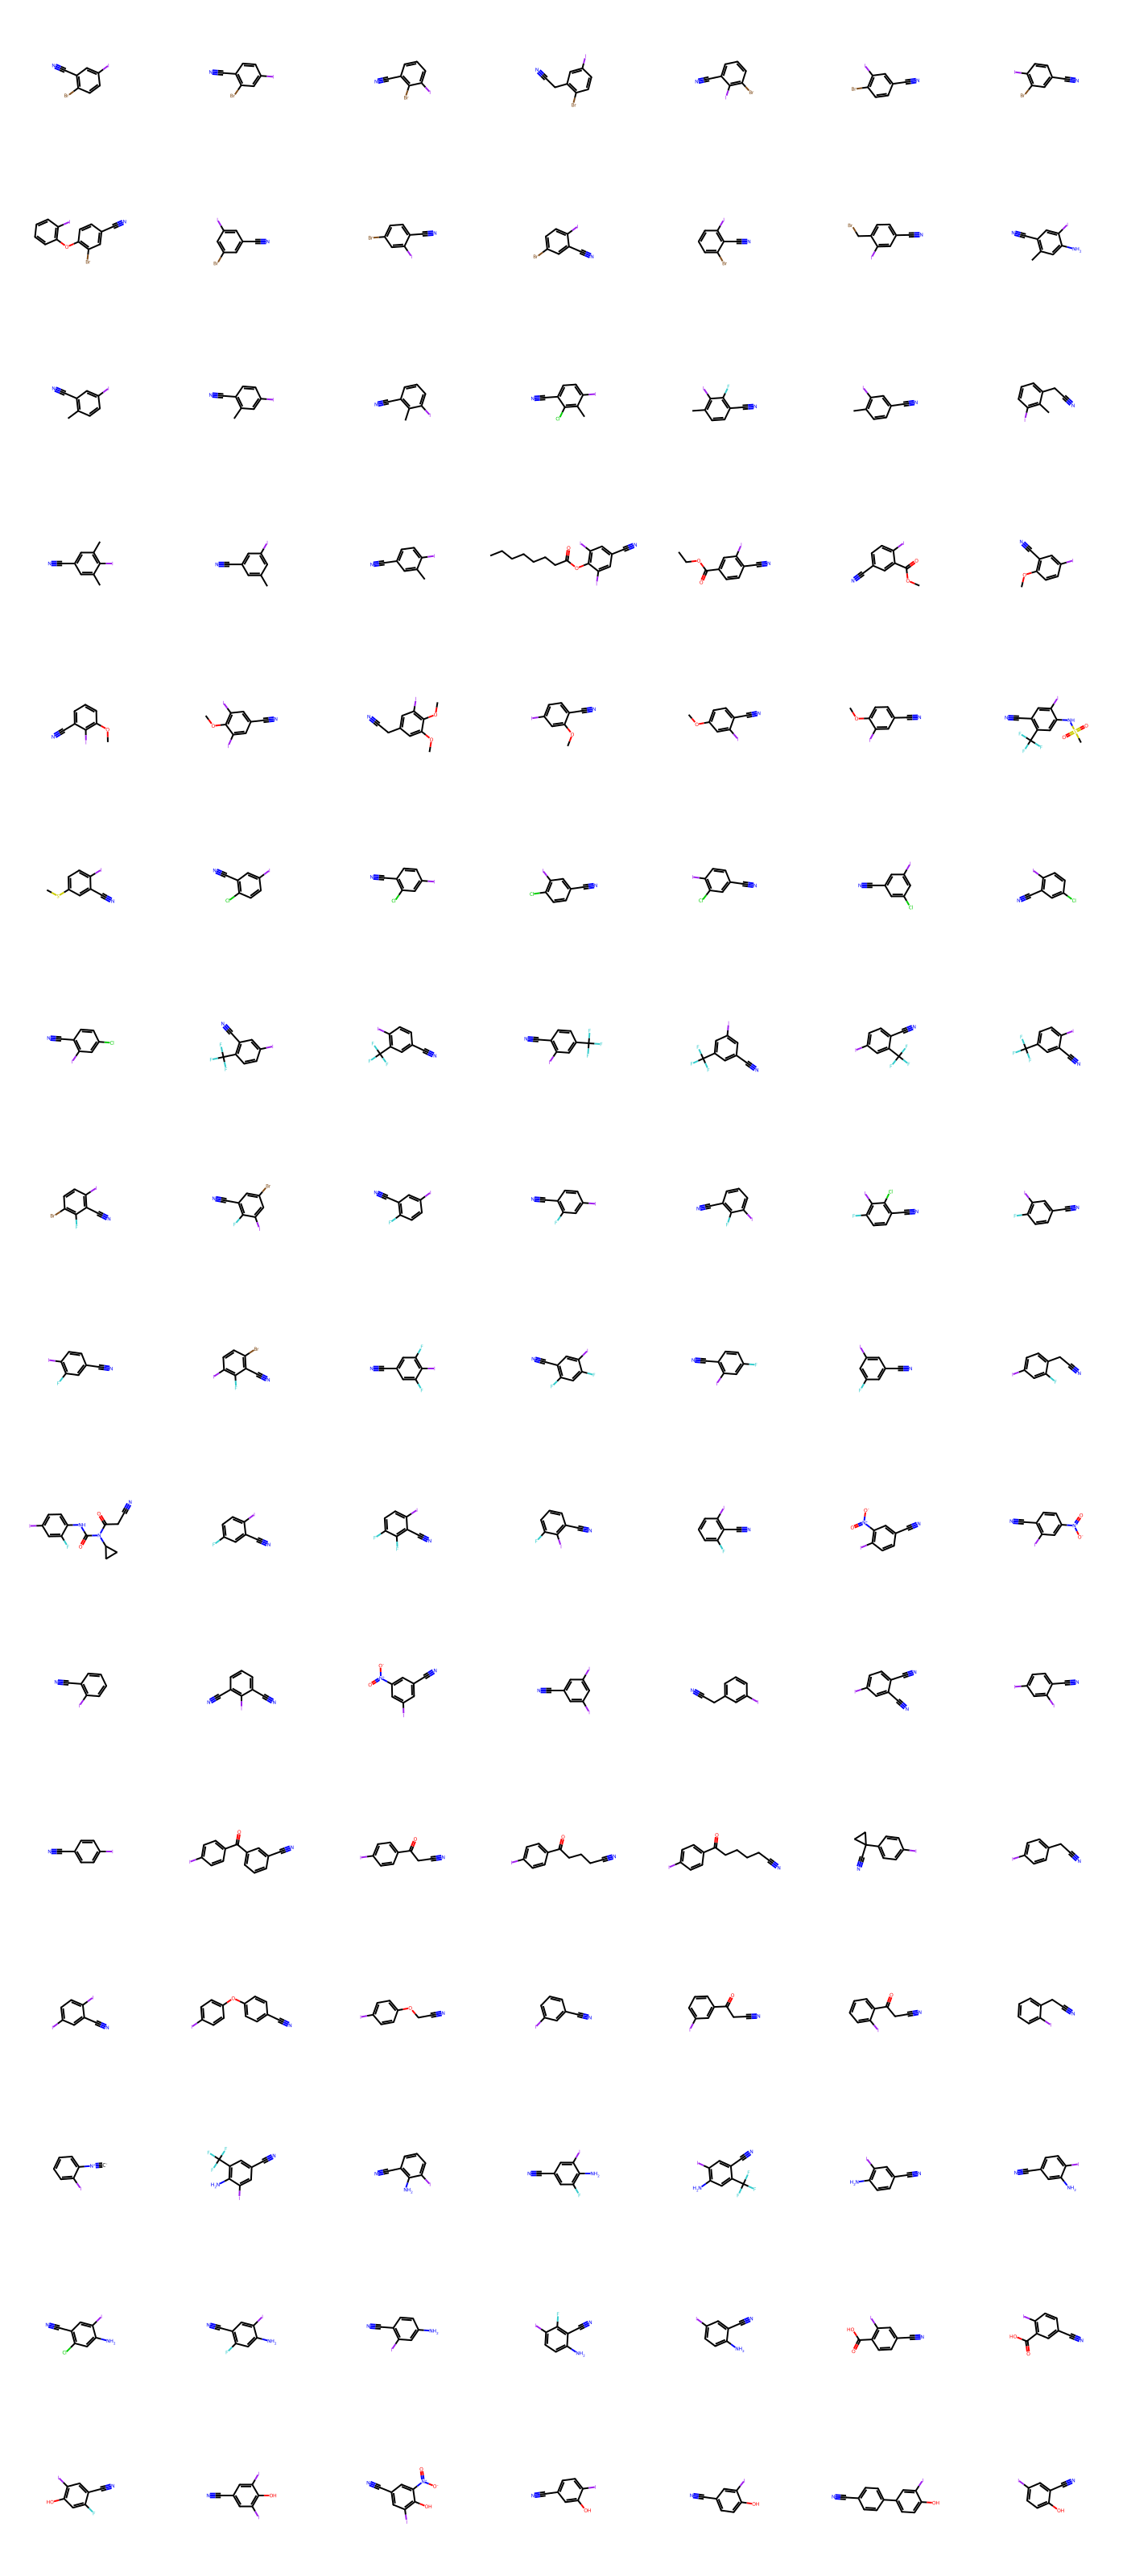

In [ ]:
updated_smiles_list = functionality_lookup(smarts_functionality="C#N",  # smarts for a nitrile
                     dset = smiles_list,  # the dataset to search
                     print_molecules = True,  # show the molecules
                     remove_from_dset= False)  # dont remove them

After looking at the molecules, we can remove them.

In [ ]:
# run the function again with different settings
updated_smiles_list = functionality_lookup(smarts_functionality="C#N",  # smarts for a nitrile (same as above)
                     dset = smiles_list,
                     print_molecules = False,  # don't show the molecules (we just did that above)
                     remove_from_dset= True)  # remove matching molecules this time

112 molecules contain the substructure 'C#N'.
Removing the matching molecules.
After pruning, the dataset still contains 1943 molecules.


This step can now be repeated for all functional groups that are supposed to be removed. Once the compound curation is finished, we can save the SMILES list again.

In [ ]:
# save the updated smiles list
pd.DataFrame(updated_smiles_list,columns=["SMILES"]).to_csv("curated_smiles_list.csv", index=False)

Here are some more examples of SMARTS for different molecular functionalities:

In [ ]:
fg_dict = {
    "pyridine": "c1ncccc1",
    "2-bromopyridines": "c1cccnc1Br",
    "pyrrole": "c1nccc1",
    "pyrazole": "c1nncc1",
    "imidazole": "c1ncnc1",
    "oxazole": "c1ncoc1",
    "thiazole": "c1ncsc1",
    "N-O heteroaromatic": "no",
    "N-S heteroaromatic": "ns",
    "phenol": "c[OH1]",
    "acid": "[C,c]C(=O)[OH1]",
    "ester": "[C,c]C(=O)O[C,c]",
    "amide": "[C,c]C(=O)N",
    "aldehyde": "[CH1](=O)",
    "ketone": "[C,c]C(=O)[C,c]",
    "nitro": "N(=O)O",
    "ArF": "cF",
    "ArCl": "cCl",
    "ortho-subst. aryl bromide": "c(C)cBr",
    "nitrile": "C#N",
    "tert. amine": "[NH0]",
    "sec. amine": "[NH1]",
    "prim. amine": "[NH2]",
    "N-H aromatic": "[nH1]"
}